In [71]:

import pandas as pd
import numpy as nm
import nltk, re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.book import FreqDist
import matplotlib.pyplot as plt
#pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.width',1000)
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import sys
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [2]:
# load the excel file

fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\200213 values.xlsx")

data = pd.read_excel(fd,sheet_name=0)


In [3]:
fe = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\200213 labels1.xlsx")
datal = pd.read_excel(fe)

In [4]:
banks = zip(datal['q21'],data['q21'])
l = sorted(list(set(banks)))

In [5]:
l[2][0]



'Alerus Financial'

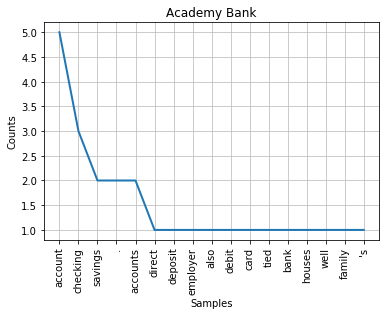

In [434]:

string = (' '.join(data[data['q21']==71]['q22']))
string =  string.lower()

stop_words = set(stopwords.words('english')) 
tokens = word_tokenize(string)
final_l = [w for w in tokens if w not in stop_words]
fdist1 = FreqDist(final_l)
fdist1.plot(title=l[1][0])


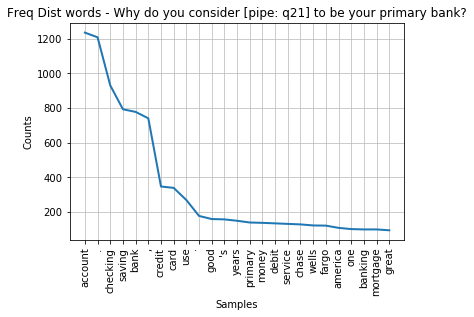

In [460]:

#List of National Banks Chase=1,Citibank=2,Bank of America = 3,Wells Fargo = 4,Ally = 5,Synchrony bank = 6,Discover bank = 7

#i = 10
#string = (' '.join(data[data['q21']==l[i][1]]['q22']))
string = (' '.join(str(v) for v in data[data['q21']<8]['q22']))
string =  string.lower()
string = string.replace('accounts','account')
string = string.replace('savings','saving')
stop_words = set(stopwords.words('english')) 
tokens = word_tokenize(string)
final_l = [w for w in tokens if w not in stop_words]
fdist1 = FreqDist(final_l)
#fdist1.plot(50,title=l[i][0])
fdist1.plot(25,title='Freq Dist words - Why do you consider [pipe: q21] to be your primary bank?')    

#i = 50
#print (l[i][0])
#print(data[data['q21']==l[i][1]]['q22'])

In [6]:
state = zip(datal['q1'],data['q1'])
l1 = sorted(list(set(state)))

In [11]:
l1[:20]

[('Alabama', 1),
 ('Alaska', 2),
 ('Arizona', 3),
 ('Arkansas', 4),
 ('California', 5),
 ('Colorado', 6),
 ('Connecticut', 7),
 ('Delaware', 8),
 ('Florida', 9),
 ('Georgia', 10),
 ('Hawaii', 11),
 ('Idaho', 12),
 ('Illinois', 13),
 ('Indiana', 14),
 ('Iowa', 15),
 ('Kansas', 16),
 ('Kentucky', 17),
 ('Louisiana', 18),
 ('Maine', 19),
 ('Maryland', 20)]

In [8]:
j=32
set(data[data['q1']==j]['q21'])

{1, 2, 3, 4, 11, 12, 16, 23, 25, 26, 34, 38, 41, 54, 126, 162, 303}

In [9]:
#q44 - 1: Not at all likely,2: Not likely,3: Somewhat likely,4: Very likely
#f = pd.DataFrame(data[(data['q1']==j)&((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))].loc[:,'q44'])
f = pd.DataFrame(data[(data['q1']==j)&((data['q21']==1)|(data['q21']==2)|(data['q21']==3)|(data['q21']==4)|(data['q21']==5)|(data['q21']==6)|(data['q21']==7))].loc[:,'q44'])
#f = pd.DataFrame(data[(data['q21']==2)|(data['q21']==3)|(data['q21']==4)].loc[:,'q44'])
df = f.groupby(['q44']).size().to_frame('count')
df['percentage'] = round(df['count'].div(sum(df['count'])).mul(100),0)
print (df)

#colum = pd.DataFrame ({'variable':[1,2,3,4],'value':['not at all likely','not likely','somewhat likely','very likely']})
#df['variable']=df.index
#df.drop('q44',axis=1)
#df1= pd.merge(df,colum)
#df1
#df_ind = [df.index]
#datal.iloc[df_ind[0],[1375,1376]]
#all regional banks for a particula state and question 32 
# I would not consider it=1,i might consider it =2,i would seriouly consider it=3,it would be my top choice=4
#std =  data[(data['q21']==n) & (data['q1']==j)].iloc[:,1011:1313].fillna(0).std()

#k = []
#for i in range(len(std)):
#    if std[i] > 0.0:
#        k.append(std.index[i])
    
    
#df3 = data[(data['q21']==n) & (data['q1']==j)][k].fillna(0)
#df3
#datal.loc[df_ind[0],'q32r1':'q32r302'].fillna(0)


     count  percentage
q44                   
1    25     25.0      
2    37     37.0      
3    15     15.0      
4    23     23.0      


In [998]:
item = [11, 23, 25, 26, 34, 41, 54, 162]


[k for k in l if k[1] in item]

[('Capital One', 25),
 ('Citizens Bank', 11),
 ('City National Bank', 41),
 ('HSBC', 34),
 ('Investors Bank', 162),
 ('M&T Bank', 26),
 ('New York Community Bank', 54),
 ('Santander Bank', 23)]

In [34]:
#Male = 1, Female=2,Other = 3, Prefer not to answer = 4
#df.groupby(['q4']).size()
#df.groupby(['q6','q4']).size() 
#NY those likely to switch regional primary bank are in the age range between 23-62, 
# 16 Male and 5 female, male in the age range from 23-62 and femals age range from 23-35

#Q7R1 - Checking Account, q7r2 - saving account, q7r3-debitcard,q7r4-moneymarket,q7r5-CD
#q7r6-self directed broekerage account, q7r7-IRA,q7r8-401K,q7r9-managed portfolio/ivestment account, q7r10-mutualfunds
#q7r11-credit card, #q7r12 - none of these
#Q23 1: Less than 6 months, 2: 6 months - less than 1 year 
#    3: 1 year - less than 2 years 4: 2 years - less than 3 years 5: 3 years - less than 5 years
#    6: 5 years - less than 10 years 7: 10 years or longer 8: Don't remember

#df = data[((data['q1']==j)&(data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))&((data['q44']==3)|(data['q44']==4))]
#df = data[((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))]

#df.groupby(['q26r3']).size()

reglikely = data[((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))
            &((data['q44']==4))]
regnotlikely = data[((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))
           &((data['q44']==1))]

globallikely = data[((data['q21']==1)|(data['q21']==2)|(data['q21']==3)|(data['q21']==4)|(data['q21']==5)|(data['q21']==6)|(data['q21']==7))
            &((data['q44']==4))]
globalnotlikely = data[((data['q21']==1)|(data['q21']==2)|(data['q21']==3)|(data['q21']==4)|(data['q21']==5)|(data['q21']==6)|(data['q21']==7))
            &((data['q44']==1))]


In [11]:
#q35 1: Rarely of never, 2: Less than once a month, 3: Once a month, 4: 2-3 times per month, 5: Weekly

df1 = data[((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))
            &((data['q44']==4))
            &((data['q35r2']>2)|(data['q35r3']>2)) 
           ]
df2 = data[((data['q21']!=1)&(data['q21']!=2)&(data['q21']!=3)&(data['q21']!=4)&(data['q21']!=5)&(data['q21']!=6)&(data['q21']!=7)&(data['q21']!=303))
           &((data['q44']==1))
           &((data['q35r2']>2)|(data['q35r3']>2)) 
          ]
df3 = data[((data['q21']==1)|(data['q21']==2)|(data['q21']==3)|(data['q21']==4)|(data['q21']==5)|(data['q21']==6)|(data['q21']==7))
            &((data['q44']==4))
            &((data['q35r2']>2)|(data['q35r3']>2)) 
           ]
df4 = data[((data['q21']==1)|(data['q21']==2)|(data['q21']==3)|(data['q21']==4)|(data['q21']==5)|(data['q21']==6)|(data['q21']==7))
            &((data['q44']==1))
            &((data['q35r2']>2)|(data['q35r3']>2)) 
           ]


In [12]:
lendf1= len(df1)
lendf2= len(df2)
lendf3= len(df3)
lendf4= len(df4)

webnl2 = len(df2[(df2['q36r1c1']==1)|(df2['q36r2c1']==1)|(df2['q36r3c1']==1)|(df2['q36r4c1']==1)|(df2['q36r5c1']==1)|(df2['q36r6c1']==1)|(df2['q36r7c1']==1)|(df2['q36r8c1']==1)|(df2['q36r9c1']==1)|(df2['q36r10c1']==1)|(df2['q36r11c1']==1)])
phonenl2 = len(df2[(df2['q36r1c2']==1)|(df2['q36r2c2']==1)|(df2['q36r3c2']==1)|(df2['q36r4c2']==1)|(df2['q36r5c2']==1)|(df2['q36r6c2']==1)|(df2['q36r7c2']==1)|(df2['q36r8c2']==1)|(df2['q36r9c2']==1)|(df2['q36r10c2']==1)|(df2['q36r11c2']==1)])

webl1 = len(df1[(df1['q36r1c1']==1)|(df1['q36r2c1']==1)|(df1['q36r3c1']==1)|(df1['q36r4c1']==1)|(df1['q36r5c1']==1)|(df1['q36r6c1']==1)|(df1['q36r7c1']==1)|(df1['q36r8c1']==1)|(df1['q36r9c1']==1)|(df1['q36r10c1']==1)|(df1['q36r11c1']==1)])
phonenl1 = len(df1[(df1['q36r1c2']==1)|(df1['q36r2c2']==1)|(df1['q36r3c2']==1)|(df1['q36r4c2']==1)|(df1['q36r5c2']==1)|(df1['q36r6c2']==1)|(df1['q36r7c2']==1)|(df1['q36r8c2']==1)|(df1['q36r9c2']==1)|(df1['q36r10c2']==1)|(df1['q36r11c2']==1)])

webnl3 = len(df3[(df3['q36r1c1']==1)|(df3['q36r2c1']==1)|(df3['q36r3c1']==1)|(df3['q36r4c1']==1)|(df3['q36r5c1']==1)|(df3['q36r6c1']==1)|(df3['q36r7c1']==1)|(df3['q36r8c1']==1)|(df3['q36r9c1']==1)|(df3['q36r10c1']==1)|(df3['q36r11c1']==1)])
phonenl3 = len(df3[(df3['q36r1c2']==1)|(df3['q36r2c2']==1)|(df3['q36r3c2']==1)|(df3['q36r4c2']==1)|(df3['q36r5c2']==1)|(df3['q36r6c2']==1)|(df3['q36r7c2']==1)|(df3['q36r8c2']==1)|(df3['q36r9c2']==1)|(df3['q36r10c2']==1)|(df3['q36r11c2']==1)])

webnl4 = len(df4[(df4['q36r1c1']==1)|(df4['q36r2c1']==1)|(df4['q36r3c1']==1)|(df4['q36r4c1']==1)|(df4['q36r5c1']==1)|(df4['q36r6c1']==1)|(df4['q36r7c1']==1)|(df4['q36r8c1']==1)|(df4['q36r9c1']==1)|(df4['q36r10c1']==1)|(df4['q36r11c1']==1)])
phonenl4 = len(df4[(df4['q36r1c2']==1)|(df4['q36r2c2']==1)|(df4['q36r3c2']==1)|(df4['q36r4c2']==1)|(df4['q36r5c2']==1)|(df4['q36r6c2']==1)|(df4['q36r7c2']==1)|(df4['q36r8c2']==1)|(df4['q36r9c2']==1)|(df4['q36r10c2']==1)|(df4['q36r11c2']==1)])


In [1212]:
print ((webnl3/lendf3),(phonenl3/lendf3))

print ((webnl4/lendf4),(phonenl4/lendf4))

0.863849765258216 0.9295774647887324
0.6391251518833536 0.7739975698663426


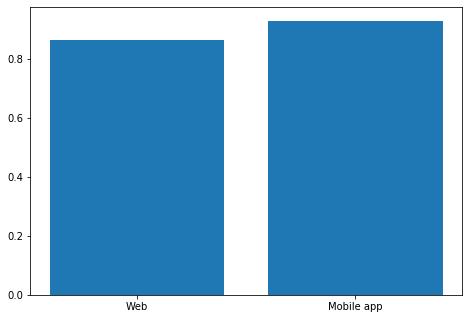

In [1209]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
platform = ['Web', 'Mobile app']
percentage = [(webnl3/lendf3),(phonenl3/lendf3)]
ax.bar(platform,percentage)
plt.show()

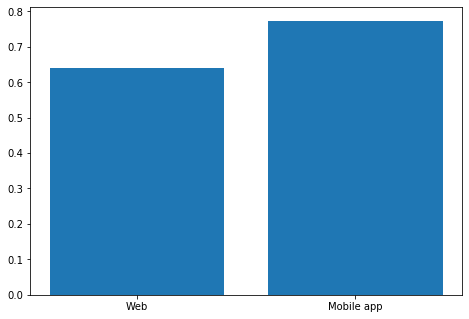

In [1211]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
platform = ['Web', 'Mobile app']
percentage = [(webnl4/lendf4),(phonenl4/lendf4)]
ax.bar(platform,percentage)
plt.show()

In [17]:
plotage = pd.DataFrame(df1.groupby(['q4']).size())
plotage['x'] = plotage.index
plotage2 = pd.DataFrame(df2.groupby(['q4']).size())
plotage2['x'] = plotage2.index
plotage3 = pd.DataFrame(df3.groupby(['q4']).size())
plotage3['x'] = plotage3.index
plotage4 = pd.DataFrame(df4.groupby(['q4']).size())
plotage4['x'] = plotage4.index

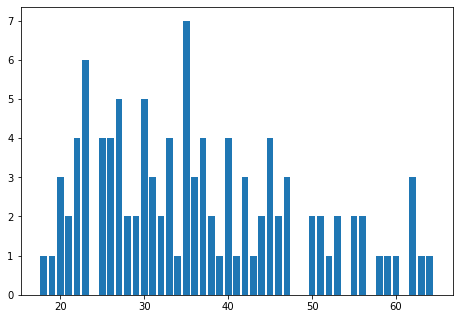

In [21]:
#plot of age among those likely to switch regional and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage['x']
count = plotage[0]
ax.bar(age,count)
plt.show()

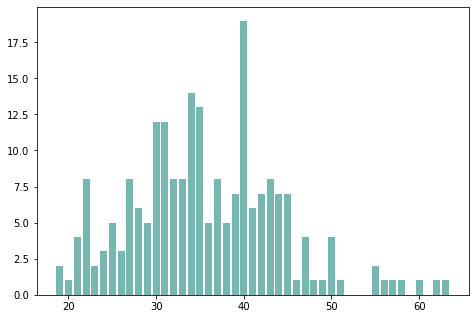

In [1214]:
#plot of age among those likely to switch global and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage3['x']
count = plotage3[0]
ax.bar(age,count,color='#76b7b2')
plt.show()

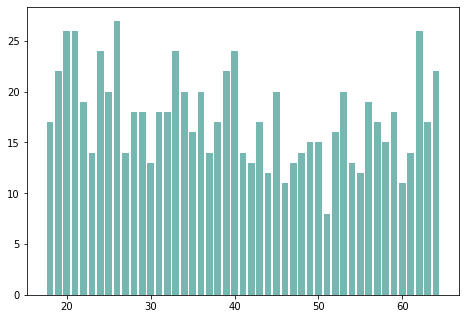

In [1215]:
#plot of age among those not likely to switch global and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage4[1]
count = plotage4[0]
ax.bar(age,count,color='#76b7b2')
plt.show()

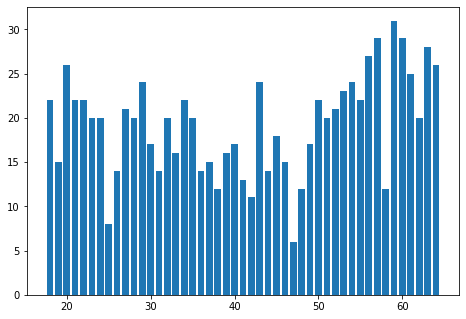

In [1216]:
#plot of age among those not likely to switch regional and those who use mobile/ web atleast once a month or more
#color for global #76b7b2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage2[1]
count = plotage2[0]
ax.bar(age,count)
plt.show()

In [25]:
#Male: 1, Female: 2, Other: 3, Prefer not to answer: 4
plotage = pd.DataFrame(df1.groupby(['q6']).size())
plotage['sex'] = plotage.index
plotage2 = pd.DataFrame(df2.groupby(['q6']).size())
plotage2['sex'] = plotage2.index
plotage3 = pd.DataFrame(df3.groupby(['q6']).size())
plotage3['sex'] = plotage3.index
plotage4 = pd.DataFrame(df4.groupby(['q6']).size())
plotage4['sex'] = plotage4.index


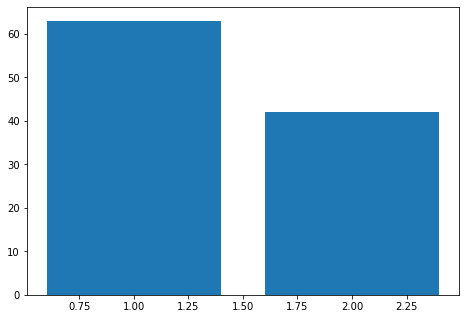

In [26]:
#plot of sex among those likely to switch regional and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage['sex']
count = plotage[0]
ax.bar(age,count)
plt.show()

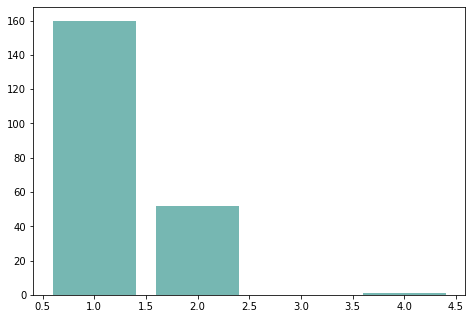

In [31]:
#plot of sex among those likely to switch global and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage3['sex']
count = plotage3[0]
ax.bar(age,count,color='#76b7b2')
plt.show()

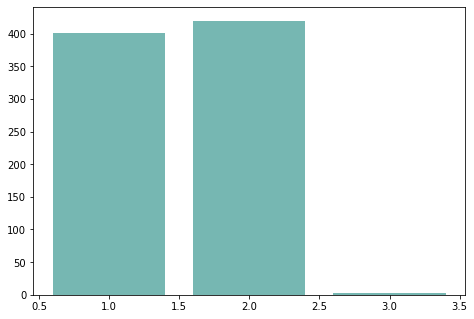

In [32]:
#plot of sex among those not likely to switch global and those who use mobile/ web atleast once a month or more
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage4['sex']
count = plotage4[0]
ax.bar(age,count,color='#76b7b2')
plt.show()

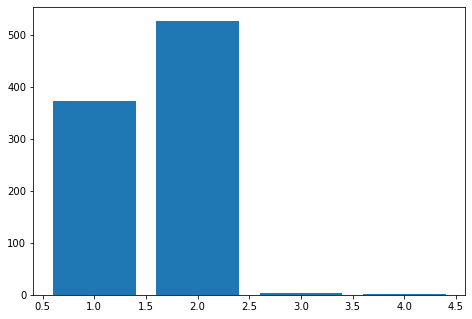

In [33]:
#plot of sex among those not likely to switch regional and those who use mobile/ web atleast once a month or more
#color for global #76b7b2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = plotage2['sex']
count = plotage2[0]
ax.bar(age,count)
plt.show()

In [69]:
pd.options.display.max_rows = 4000
globallikely['q25']

5       NaN                                                                                                                                                  
52      this bank provide best coustomar scervice                                                                                                            
53      NaN                                                                                                                                                  
67      NaN                                                                                                                                                  
71      good bank                                                                                                                                            
89      NaN                                                                                                                                                  
99      NaN                                         

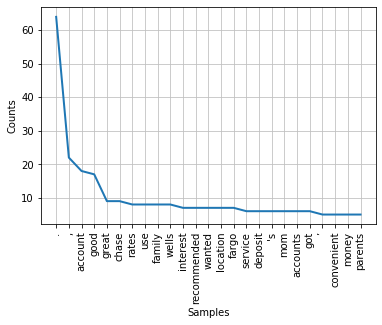

In [70]:

string = (' '.join(globalnotlikely['q25'].astype(str)))
string =  string.lower()
string = string.replace('locations','location')
stop_words = set(stopwords.words('english')) 
stop_words.update(['get','always','chose','already','used','could','nan','bank'])
tokens = word_tokenize(string)
final_l = [w for w in tokens if w not in stop_words]
fdist1 = FreqDist(final_l)
fdist1.plot(25)

In [128]:
# Test MCA file

fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\mca test.xlsx")

mcatest = pd.read_excel(fd,sheet_name=0)

In [129]:
good_data = mcatest.drop(['Username'],axis=1)
good_data= good_data.apply(pd.to_numeric,errors='coerce')
good_data = good_data.fillna(0)
[ col  for col, dt in good_data.dtypes.items() if dt == object]

[]

In [131]:

chi_square_value,p_value=calculate_bartlett_sphericity(good_data)
chi_square_value, p_value

(209.64425714191665, 2.066639067131611e-33)

In [77]:
kmo_all,kmo_model=calculate_kmo(good_data)

In [132]:
kmo_model

0.5442555775689378

In [133]:
fa = FactorAnalyzer(rotation=None)
fa.fit(good_data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev



array([4.99097461e+00, 1.45687492e+00, 2.61896108e-01, 1.48394380e-01,
       9.33144743e-02, 4.37912611e-02, 4.75424318e-03])

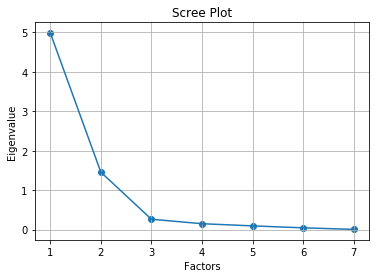

In [134]:
plt.scatter(range(1,good_data.shape[1]+1),ev)
plt.plot(range(1,good_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [135]:
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation='Varimax') 
fa.fit(good_data)
loadings = fa.loadings_

In [136]:
loadings
#each row corresponds to each columns variable
#Factor 1 has high loading with 1-4 columns and Factor 2 has high loading with last 2 variables

array([[0.90446066, 0.20608715],
       [0.91927317, 0.30635697],
       [0.95432339, 0.09994552],
       [0.96497744, 0.17186001],
       [0.16125712, 0.90870017],
       [0.2267586 , 0.92852286],
       [0.83097254, 0.30431786]])

In [120]:
fa.get_factor_variance()

# each row corresponds to SSloadings, Proportion Var, Cumulative Var 

(array([3.55156945, 1.89951846]),
 array([0.59192824, 0.31658641]),
 array([0.59192824, 0.90851465]))

In [31]:

#Colorado

col = datal[datal['q1']=='Colorado']

In [ ]:
nominal = ['q7r4', 'q7r5', 'q7r6', 'q7r7', 'q7r8', 'q7r9', 'q7r10', 'q7r11','q8r1', 'q8r2', 'q8r3', 'q8r4', 'q8r5'
           ,'q42','q55r1', 'q55r2'
           , 'q55r3', 'q55r4', 'q55r5', 'q55r6', 'q55r7', 'q55r8', 'q58', 'q59']
           

ordinal = ['q33r1', 'q33r2','q35r1', 'q35r2', 'q35r3', 'q35r4', 'q35r5', 'q35r6','q37r1', 'q37r2', 'q37r3', 'q37r4', 'q37r5', 'q37r6'
           ,'q38r1', 'q38r2', 'q38r3','q38r4', 'q38r5', 'q38r6','q9','q40r1', 'q40r2', 'q40r3', 'q40r4', 'q40r5', 'q40r6','q41r1', 'q41r2'
           , 'q41r3', 'q41r4', 'q41r5', 'q41r6','q44','q46r1', 'q46r2', 'q46r3', 'q46r4', 'q46r5', 'q46r6', 'q46r7', 'q46r8', 'q46r9'
           , 'q46r10', 'q46r11', 'q46r12', 'q46r13', 'q46r14', 'q46r15','q47r1', 'q47r2', 'q47r3', 'q47r4', 'q47r5', 'q47r6', 'q47r7'
           , 'q47r8', 'q47r9', 'q47r10','q48','q49r1', 'q49r2', 'q49r3', 'q49r4', 'q49r5', 'q49r6', 'q49r7', 'q49r8', 'q49r9', 'q49r10'
           , 'q49r11', 'q49r12', 'q49r13', 'q50r1', 'q50r2', 'q50r3', 'q50r4','q50_normr1_l', 'q50_normr1_r', 'q50_normr2_l', 'q50_normr2_r'
           , 'q50_normr3_l', 'q50_normr3_r', 'q50_normr4_l','q50_normr4_r','q54r1', 'q54r2', 'q54r3', 'q54r4', 'q54r5', 'q54r6', 'q54r7'
           , 'q54r8','q68r1', 'q68r2', 'q68r3','q68r4', 'q68r5', 'q68r6']


total =    ['q7r4', 'q7r5', 'q7r6', 'q7r7', 'q7r8', 'q7r9', 'q7r10', 'q7r11','q8r1', 'q8r2', 'q8r3', 'q8r4', 'q8r5'
           ,'q23','q24','q26r1', 'q26r2', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r9', 'q26r10', 'q26r11'
           ,'q26r12','q26r13','q26r14','q26r15', 'q26r16', 'q26r17', 'q26r18', 'q26r19', 'q26r20', 'q26r21', 'q26r22'
           , 'q27r1', 'q27r2', 'q27r3', 'q27r4', 'q27r5', 'q27r6', 'q27r7', 'q27r8', 'q27r9','q29r1', 'q29r2', 'q29r3'
           , 'q29r4', 'q29r5', 'q29r6', 'q29r7', 'q29r10', 'q29r11','q34r1', 'q34r2', 'q34r3','q36r1c1', 'q36r1c2'
           , 'q36r2c1', 'q36r2c2', 'q36r3c1', 'q36r3c2', 'q36r4c1', 'q36r4c2', 'q36r5c1', 'q36r5c2'
           , 'q36r6c1', 'q36r6c2', 'q36r7c1', 'q36r7c2', 'q36r8c1', 'q36r8c2', 'q36r9c1', 'q36r9c2', 'q36r10c1', 'q36r10c2'
           , 'q36r11c1', 'q36r11c2','q42','q51r1', 'q51r13', 'q51r15', 'q51r2', 'q51r4', 'q51r5', 'q51r14', 'q51r16', 'q51r6'
           , 'q51r7', 'q51r8', 'q51r18', 'q51r19', 'q51r17', 'q51r9', 'q51r10', 'q51r11', 'q51r12', 'q51r20','q55r1', 'q55r2'
           , 'q55r3', 'q55r4', 'q55r5', 'q55r6', 'q55r7', 'q55r8', 'q58', 'q59','q33r1', 'q33r2','q35r1', 'q35r2', 'q35r3', 'q35r4', 'q35r5', 'q35r6','q37r1', 'q37r2', 'q37r3', 'q37r4', 'q37r5', 'q37r6'
           ,'q38r1', 'q38r2', 'q38r3','q38r4', 'q38r5', 'q38r6','q9','q40r1', 'q40r2', 'q40r3', 'q40r4', 'q40r5', 'q40r6','q41r1', 'q41r2'
           , 'q41r3', 'q41r4', 'q41r5', 'q41r6','q44','q46r1', 'q46r2', 'q46r3', 'q46r4', 'q46r5', 'q46r6', 'q46r7', 'q46r8', 'q46r9'
           , 'q46r10', 'q46r11', 'q46r12', 'q46r13', 'q46r14', 'q46r15','q47r1', 'q47r2', 'q47r3', 'q47r4', 'q47r5', 'q47r6', 'q47r7'
           , 'q47r8', 'q47r9', 'q47r10','q48','q49r1', 'q49r2', 'q49r3', 'q49r4', 'q49r5', 'q49r6', 'q49r7', 'q49r8', 'q49r9', 'q49r10'
           , 'q49r11', 'q49r12', 'q49r13', 'q50r1', 'q50r2', 'q50r3', 'q50r4','q50_normr1_l', 'q50_normr1_r', 'q50_normr2_l', 'q50_normr2_r'
           , 'q50_normr3_l', 'q50_normr3_r', 'q50_normr4_l','q50_normr4_r','q54r1', 'q54r2', 'q54r3', 'q54r4', 'q54r5', 'q54r6', 'q54r7'
           , 'q54r8','q68r1', 'q68r2', 'q68r3','q68r4', 'q68r5', 'q68r6']
    

In [37]:
#count values by variable in a given column
#cl.groupby(['q49r13']).size().to_frame('count')

#find cloumns which as na values


#digital user and less than 40
#d40 = data[(data['q4'] <= 40)&(data['q35r2']>2)&(data['q35r3']>2)][nld]

#digital users and greater than 40
#d40p = data[(data['q4'] > 40)&(data['q35r2']>2)&(data['q35r3']>2)][nld]

#non digital user less than 40

#nd40 = data[(data['q4'] <= 40)&(data['q35r2']<3)&(data['q35r3']<3)][nl]

#non gigital user greater than 40

#nd40p = data[(data['q4'] > 40)&(data['q35r2']<3)&(data['q35r3']<3)][nl]

 


In [174]:
 
#d40.loc[:, d40.isna().any()]
#d40p.loc[:, d40p.isna().any()]
#nd40.loc[:, nd40.isna().any()]
#nd40p.loc[:, nd40p.isna().any()]
#fix na value
#d40[['q49r13','q52']] = d40[['q49r13','q52']].fillna(0)
#d40p[['q49r13','q52']] = d40p[['q49r13','q52']].fillna(0)
#nd40[['q49r13','q52']] = nd40[['q49r13','q52']].fillna(0)
#nd40p[['q49r13','q52']] = nd40p[['q49r13','q52']].fillna(0)


In [40]:
#cold = cold.drop(['q51r11','q51r20','q65r3','q65r4'],axis=1)
cold.to_csv('cold.csv')

In [44]:
cold.shape

(56, 143)

In [990]:
n = 1729
good_data = d40+.00001*nm.random.rand(n, 131)
good_data= good_data.apply(pd.to_numeric,errors='coerce')
good_data = good_data.fillna(0)
[ col  for col, dt in good_data.dtypes.items() if dt == object]

[]

In [991]:
chi_square_value,p_value=calculate_bartlett_sphericity(good_data)
chi_square_value, p_value

(247477.8586890973, 0.0)

In [992]:
kmo_all,kmo_model=calculate_kmo(good_data)

c:\users\varunn\appdata\local\continuum\anaconda3\envs\py37\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [993]:
#Kmo to be greater .7 min, could be greater than .5 best practice is .7
kmo_model

0.9044099307046095

In [994]:
fa = FactorAnalyzer(rotation=None)
fa.fit(good_data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
#ev


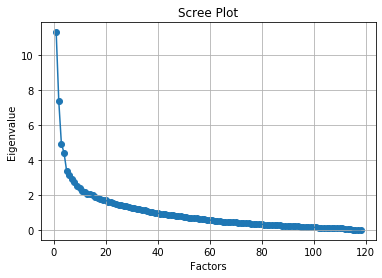

In [879]:
plt.scatter(range(1,good_data.shape[1]+1),ev)
plt.plot(range(1,good_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [995]:
# egine value to be greater then 1 to identify factors
len(ev[ev > 1])

30

In [996]:
fa = FactorAnalyzer()
fa.set_params(n_factors=30, rotation='Varimax') 
fa.fit(good_data)
loadings = fa.loadings_

In [573]:

#nm.set_printoptions(threshold=sys.maxsize)
#loadings

In [953]:
load = pd.DataFrame(loadings)


In [171]:
#cumulative variance should be greater then .5
fa.get_factor_variance()

In [956]:
#loading cutoff is based on sample size with .3 if the sample is greater than 300,250-.35,200-.4,150-.45,100-.55,85-.6,70-.65,50-.75

load['col'] = pd.DataFrame(good_data.columns)
load['factor'] = 0 


cols = ['col','factor',0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
# move the column to head of list using index, pop and insert
#cols.insert(0, cols.pop(cols.index('col')))

load = load.reindex(columns = cols)

#assign a factor to the column variable if the factor is above .6
for k in range(0,38):
    for i in (load[load.loc[:,k] > .5]['factor'].index):
        load.loc[i,'factor'] = k+1
 

In [846]:
# load the excel file

fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\200213 values.xlsx")

colname = pd.read_excel(fd,sheet_name='Sheet3')
colname = colname.rename(columns={'Question no': 'col','Unnamed: 2':'Text2'})   



In [957]:
load = load.merge(colname)

In [958]:
nd40pana = load[load['factor']>0][['col','factor','Text','Text2']].sort_values(['factor'])

In [960]:
nd40pana.to_csv('nd40pana.csv')

In [ ]:
pd.options.display.max_seq_items = 2000
data.columns

In [337]:



 




numeric_sup = ['q4']

qualitative_sup = ['q1','q6','q60','q61r1','q61r2','q61r3','q61r4','q62','q63','q64r1'
                   ,'q64r2','q64r3','q64r4','q64r5','q65r1','q65r2', 'q65r3', 'q65r4', 'q65r5','q65r6','q66','q67']

                
psycographic = ['q48','q49r1', 'q49r2', 'q49r3', 'q49r4', 'q49r5', 'q49r6', 'q49r7', 'q49r8', 'q49r9', 'q49r10'
                ,'q49r11','q49r12', 'q49r13','q50_normr1_l', 'q50_normr1_r'
                , 'q50_normr2_l', 'q50_normr2_r', 'q50_normr3_l', 'q50_normr3_r', 'q50_normr4_l','q50_normr4_r']
                
                
Appealoffeatures = ['q54r1', 'q54r2', 'q54r3', 'q54r4', 'q54r5', 'q54r6', 'q54r7', 'q54r8','q68r1', 'q68r2', 'q68r3','q68r4'
                    ,'q68r5', 'q68r6','q68r7']

fsactivites = ['q55r1', 'q55r2', 'q55r3', 'q55r4', 'q55r5', 'q55r6', 'q55r7', 'q55r8', 'q55r9',
              'q56r1','q56r2','q56r3','q56r4','q56r5','q56r6']

accounttypes = ['q7r1','q7r2','q7r3','q7r4','q7r5','q7r6','q7r7','q7r8','q7r9','q7r10','q7r11','q7r12',
                'q8r1','q8r2','q8r3','q8r4','q8r5','q8r6','q8r7','q47r1', 'q47r2', 'q47r3', 'q47r4', 'q47r5'
                , 'q47r6', 'q47r7', 'q47r8', 'q47r9', 'q47r10','q57r1','q57r2','q57r3','q57r4','q57r5','q57r6'
                ,'q57r7','q57r8','q57r9','q57r10','q57r11','q57r12','q57r14','q57r15','q57r16','q57r17','q57r18'
                ,'q57r19','q57r20','q57r21','q57r22','q57r23','q57r24','q57r25','q57r26','q58','q59']


primarybank = ['q23','q29r1', 'q29r2', 'q29r3', 'q29r4', 'q29r5', 'q29r6', 'q29r7', 'q29r10', 'q29r11','q29r8','q29r9'
              'q46r1', 'q46r2', 'q46r3', 'q46r4', 'q46r5', 'q46r6', 'q46r7', 'q46r8', 'q46r9','q46r10','q46r11','q46r12'
               ,'q46r13','q46r14','q46r15']

primarybankswitch = ['q24','q26r1', 'q26r2', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r9', 'q26r10', 'q26r11'
           ,'q26r12','q26r13','q26r14','q26r15', 'q26r16', 'q26r17', 'q26r18', 'q26r19', 'q26r20', 'q26r21', 'q26r22','q26r23'
           ,'q26r24','q27r1', 'q27r2', 'q27r3', 'q27r4', 'q27r5', 'q27r6', 'q27r7', 'q27r8', 'q27r9','q27r10','q44']          
    
    
bankingbehav = ['q33r1', 'q33r2','q34r1', 'q34r2', 'q34r3','q34r4','q35r1', 'q35r2', 'q35r3', 'q35r4', 'q35r5', 'q35r6']

digital = ['q36r1c1', 'q36r1c2', 'q36r2c1', 'q36r2c2', 'q36r3c1', 'q36r3c2', 'q36r4c1', 'q36r4c2', 'q36r5c1', 'q36r5c2'
           , 'q36r6c1', 'q36r6c2', 'q36r7c1', 'q36r7c2', 'q36r8c1', 'q36r8c2', 'q36r9c1', 'q36r9c2', 'q36r10c1', 'q36r10c2'
           , 'q36r11c1', 'q36r11c2']

siteapprating = ['q37r1', 'q37r2', 'q37r3', 'q37r4', 'q37r5', 'q37r6','q38r1', 'q38r2', 'q38r3','q38r4', 'q38r5','q38r6']

financialgoals = ['q51r1','q51r13', 'q51r15', 'q51r2', 'q51r4', 'q51r5', 'q51r14', 'q51r16', 'q51r6', 'q51r7', 'q51r8', 'q51r18'
            ,'q51r19', 'q51r17', 'q51r9', 'q51r10', 'q51r11', 'q51r12', 'q51r20','q52']
    

parenting = ['q40r1','q40r2','q40r3','q40r4','q40r5','q40r6','q41r1','q41r2','q41r3','q41r4','q41r5','q41r6','q42']


#26,27 are conditional questions
#36,37 are conditional questions
                
#q9 - are you a parent of guardian of any children under age 18 - yes / no
#q10r1 - are yoou a parent of children over age 18-24
#q10r2 - are you a parent of childen over age 25
#q10r3 - no


#q44 likely to switch,financialgoals,appealoffeatures,parenting,
#suplementary - urban/rural location,relationship status,parents - PNC bank 


In [ ]:

#supplementary data - q9,q101,q102,q103,q21, Q35-login to computer and use bank's mobile app,Q62,Q63,Q65,Q67

#active - #29,#q33,Q36,q40,Q41,Q42,Q44,Q46,Q48,Q49,Q50,Q52,Q54,Q68,Q55,Q58,Q59,

#PNC Bank-9,TD Bank-12,Huntington Bank-32,SunTrust Bank-24,Santander Bank-23,Capital One-25,M&T Bank-26,Discover Bank-7,BBVA-30


In [345]:
banklist = data[(data['q21']==9)|(data['q21']==12)|(data['q21']==32)|(data['q21']==24)|(data['q21']==23)|(data['q21']==25)|(data['q21']==26)|(data['q21']==7)|(data['q21']==30)].index
#supcols = ['q9','q10r1','q10r2','q21','q35r2','q35r3']
#activecols =['q29r1', 'q29r2', 'q29r3', 'q29r4', 'q29r5', 'q29r6', 'q29r7', 'q29r10', 'q29r11','q29r8','q29r9','q33r1', 'q33r2']+digital+parenting+['q44']+['q46r1', 'q46r2', 'q46r3', 'q46r4', 'q46r5', 'q46r6', 'q46r7', 'q46r8', 'q46r9','q46r10','q46r11','q46r12','q46r13','q46r14','q46r15']+psycographic+

supcols = ['q9','q10r1','q10r2','q21','q62','q63','q65r2', 'q65r3', 'q65r4', 'q65r5','q65r6','q67']
activecols = ['q35r1', 'q35r2', 'q35r3', 'q35r4', 'q35r5', 'q35r6']+parenting+['q44']+financialgoals+Appealoffeatures
totcol = supcols+activecols
allbank = datal.iloc[banklist,:][totcol]
allbank = allbank.fillna('nan')


In [ ]:
#cold.loc[:,cold.isna().any()]
#cold = cold.drop(['q65r6oe'],axis=1)
#colnd.loc[:,colnd.isna().any()]
#col.shape

In [349]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\allbank.csv")
allbank.to_csv(fd)

In [127]:
# dataset to test clusing after running MCA

fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\mca test w dimen.xlsx")

df = pd.read_excel(fd,sheet_name=0)

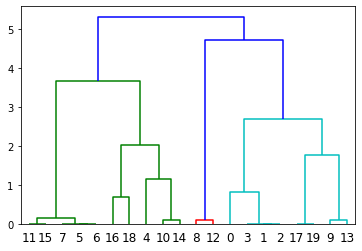

In [80]:

points = df.drop('Userid',axis=1)
#create a dendogram
dendrogram = sch.dendrogram(sch.linkage(points,method='ward'))

In [104]:
#perfrom the actual clustering
hc = AgglomerativeClustering(n_clusters=6,affinity = 'euclidean',linkage='ward')

In [105]:
#predict the cluster for each data point
y_hc = hc.fit_predict(points)

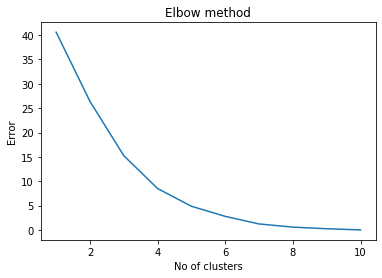

In [93]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(points)
    kmeans.fit(points)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [99]:
from sklearn.mixture import GaussianMixture

bic = nm.zeros(9)
n = nm.arange(1,10)
models = []
#loop through each number of Gaussians and compute the BIC, and save the model
for i,j in enumerate(n):
    #create mixture model with j components
    gmm = GaussianMixture(n_components=j)
    #fit it to the data
    gmm.fit(points)
    #compute the BIC for this model
    bic[i] = gmm.bic(points)
    #add the best-fit model with j components to the list of models
    models.append(gmm)

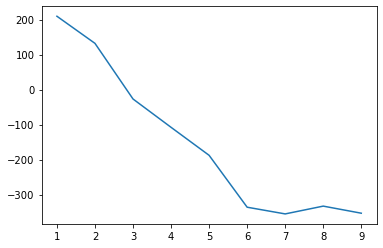

In [100]:
 plt.plot(n,bic)

In [102]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.metrics import silhouette_score
n1 = nm.arange(2,11)
score = []

for i in n1:
    clusterer = GaussianMixture(n_components=i).fit(points)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(points)
# TODO: Find the cluster centers
    centers = clusterer.means_
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen


    score.append(silhouette_score(points,preds))
   
print(score)

[0.3755081806503696, 0.512961879469368, 0.6198624172682525, 0.6593366206484863, 0.7212782148433728, 0.8040058369140638, 0.8073870542267374, 0.7645176733549851, 0.7678988906676587]


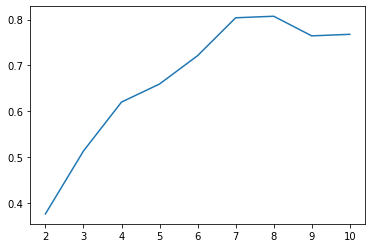

In [103]:
 plt.plot(n1,score)

In [115]:
clusterer = GaussianMixture(n_components=6).fit(points)
preds = clusterer.predict(points)
centers = clusterer.means_

In [107]:
y_hc

array([4, 4, 4, 4, 1, 3, 3, 3, 5, 0, 1, 3, 5, 0, 1, 3, 2, 0, 2, 0],
      dtype=int64)

In [108]:
preds

array([3, 3, 3, 3, 0, 4, 4, 4, 2, 3, 0, 4, 2, 3, 0, 4, 5, 1, 5, 1],
      dtype=int64)

In [110]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, df], axis = 1)

In [112]:
plot_data.columns

Index(['Cluster', 'Userid', 'Dim 1', 'Dim 2', 'Dim 3', 'Dim 4'], dtype='object')

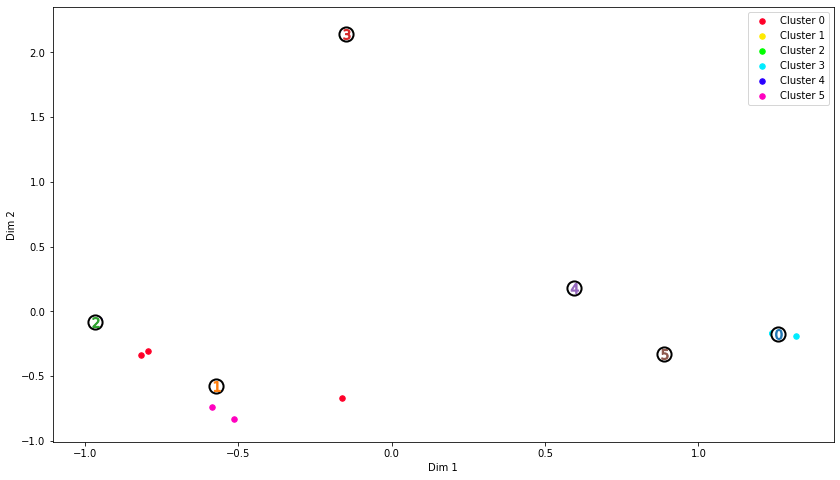

In [116]:
import matplotlib.cm as cm

# Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))
# Color map
cmap = cm.get_cmap('gist_rainbow')

# Color the points based on assigned cluster
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dim 1', y = 'Dim 2', \
    color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
    
for i, c in enumerate(centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
    alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

### 10 banks clustering

In [350]:
# dataset to test clusing after PNC bank

fd = (r"C:\Users\varunn\Documents\Confluence attachments\Finance service research\allbankmcaresults.xlsx")

allbank = pd.read_excel(fd,sheet_name='Sheet2')

In [351]:
allbank.columns

Index(['ind', 'Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9', 'Dim 10', 'Dim 11', 'Dim 12', 'Dim 13', 'Dim 14', 'Dim 15', 'Dim 16', 'Dim 17', 'Dim 18', 'Dim 19', 'Dim 20', 'Dim 21', 'Dim 22', 'Dim 23', 'Dim 24', 'Dim 25', 'Dim 26', 'Dim 27', 'Dim 28', 'Dim 29', 'Dim 30', 'Dim 31', 'Dim 32', 'Dim 33', 'Dim 34', 'Dim 35', 'Dim 36', 'Dim 37', 'Dim 38', 'Dim 39', 'Dim 40', 'Dim 41', 'Dim 42', 'Dim 43', 'Dim 44', 'Dim 45', 'Dim 46', 'Dim 47', 'Dim 48', 'Dim 49', 'Dim 50'], dtype='object')

In [369]:
allbank = allbank.iloc[:,0:6]

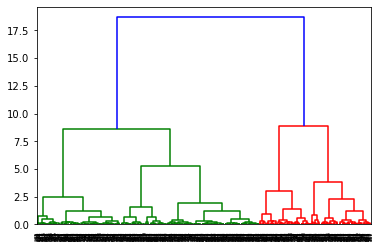

In [370]:
pointsall = allbank.drop('ind',axis=1)
#create a dendogram for 10 prospect banks
dendrogram = sch.dendrogram(sch.linkage(pointsall,method='ward'))

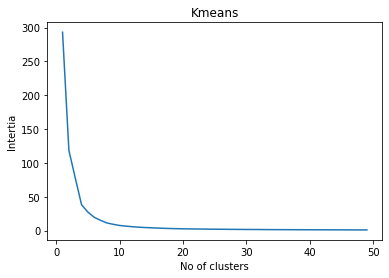

In [371]:
#identifying the number of clusters using Elbow,10 initialization and 300 iterations

Error =[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i,n_init=40,random_state=10).fit(pointsall)
    kmeans.fit(pointsall)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Kmeans')
plt.xlabel('No of clusters')
plt.ylabel('Intertia')
plt.show()

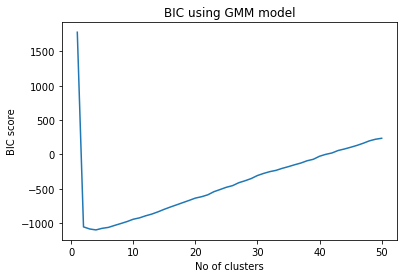

In [372]:
#identifying the number of clusters using GaussianMixture and evaluating BIC score

from sklearn.mixture import GaussianMixture

bic = nm.zeros(50)
n = nm.arange(1,51)
models = []
#loop through each number of Gaussians and compute the BIC, and save the model
for i,j in enumerate(n):
    #create mixture model with j components
    gmm = GaussianMixture(n_components=j,max_iter=300,n_init=40,random_state=10)
    #fit it to the data
    gmm.fit(pointsall)
    #compute the BIC for this model
    bic[i] = gmm.bic(pointsall)
    #add the best-fit model with j components to the list of models
    models.append(gmm)
plt.plot(n,bic)
plt.title('BIC using GMM model')
plt.xlabel('No of clusters')
plt.ylabel('BIC score')
plt.show()



No handles with labels found to put in legend.


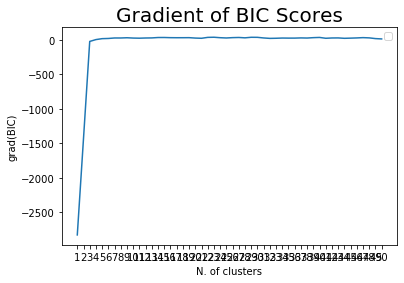

In [373]:
plt.plot(n, nm.gradient(bic))
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

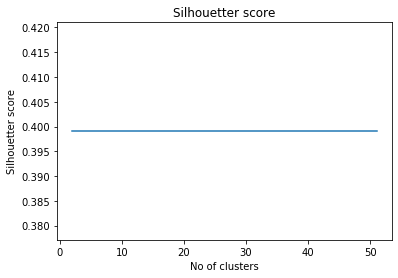

In [374]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
n1 = nm.arange(2,52)
score = []

for i in n1:
    clusterer = KMeans(n_clusters=j,n_init=10,random_state=10).fit(pointsall)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(pointsall)
# TODO: Find the cluster centers
    #centers = clusterer.means_
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen


    score.append(silhouette_score(pointsall,preds))
   
plt.plot(n1,score)
plt.title('Silhouetter score')
plt.xlabel('No of clusters')
plt.ylabel('Silhouetter score')
plt.show()

In [ ]:
clusterer = GaussianMixture(n_components=6).fit(points)
preds = clusterer.predict(points)
centers = clusterer.means_